In [69]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [70]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

In [71]:
ds=pd.read_csv('iris-dataset.csv',names=['sep_l','sep_w','pet_l','sep_w','class'])

C:\Users\chau\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\parsers.py:697: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [72]:
y=ds.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = ds.iloc[0:100, [0, 2]].values
X.T.shape

(2, 100)

In [73]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [74]:
class AdalineSGD(object):
    
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            print('cost array',len(cost))
            avg_cost = sum(cost) / len(y)
            print('avg cost',avg_cost)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y)) # generates sequence of 100 random numbers b/w 0 and 100
#         print('X[r]',len(X[r]))
#         print('y[r]',len(y[r]))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

cost array 100
avg cost 0.20394456166031524
cost array 100
avg cost 0.07361591599497305
cost array 100
avg cost 0.05595915980120137
cost array 100
avg cost 0.04616048513652026
cost array 100
avg cost 0.039384514777334234
cost array 100
avg cost 0.03477977825838303
cost array 100
avg cost 0.031657219041863846
cost array 100
avg cost 0.029612965517701775
cost array 100
avg cost 0.02811985114187205
cost array 100
avg cost 0.027075165024754613
cost array 100
avg cost 0.026343115030327834
cost array 100
avg cost 0.025908993480534163
cost array 100
avg cost 0.025690816663739714
cost array 100
avg cost 0.025388179942035075
cost array 100
avg cost 0.025269618641442088


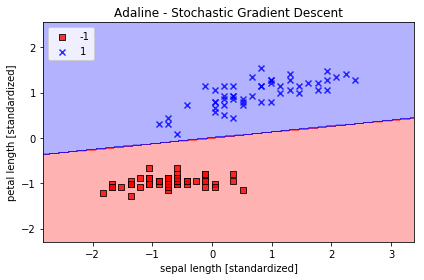

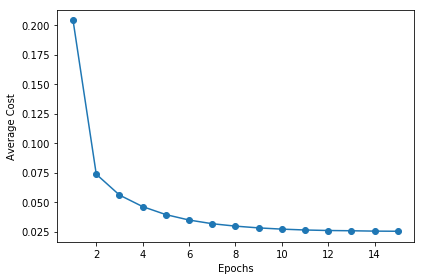

In [75]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

In [76]:
rgen=np.random.RandomState(1)
r=rgen.permutation(100)
print((r))

[80 84 33 81 93 17 36 82 69 65 92 39 56 52 51 32 31 44 78 10  2 73 97 62
 19 35 94 27 46 38 67 99 54 95 88 40 48 59 23 34 86 53 77 15 83 41 45 91
 26 98 43 55 24  4 58 49 21 87  3 74 30 66 70 42 47 89  8 60  0 90 57 22
 61 63  7 96 13 68 85 14 29 28 11 18 20 50 25  6 71 76  1 16 64 79  5 75
  9 72 12 37]
